In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,recall_score,precision_score
from sklearn.inspection import permutation_importance
import joblib

In [3]:
data = pd.read_csv("C:\\Users\\ramana777\\Downloads\\matches.csv")
print(data)

           id   season        city        date   match_type  player_of_match  \
0      335982  2007/08   Bangalore  2008-04-18       League      BB McCullum   
1      335983  2007/08  Chandigarh  2008-04-19       League       MEK Hussey   
2      335984  2007/08       Delhi  2008-04-19       League      MF Maharoof   
3      335985  2007/08      Mumbai  2008-04-20       League       MV Boucher   
4      335986  2007/08     Kolkata  2008-04-20       League        DJ Hussey   
...       ...      ...         ...         ...          ...              ...   
1090  1426307     2024   Hyderabad  2024-05-19       League  Abhishek Sharma   
1091  1426309     2024   Ahmedabad  2024-05-21  Qualifier 1         MA Starc   
1092  1426310     2024   Ahmedabad  2024-05-22   Eliminator         R Ashwin   
1093  1426311     2024     Chennai  2024-05-24  Qualifier 2    Shahbaz Ahmed   
1094  1426312     2024     Chennai  2024-05-26        Final         MA Starc   

                                       

In [4]:
print("First Five Rows:")
print(data.head())

First Five Rows:
       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner toss_decision  

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [6]:
print(data.describe())

                 id  result_margin  target_runs  target_overs
count  1.095000e+03    1076.000000  1092.000000   1092.000000
mean   9.048283e+05      17.259294   165.684066     19.759341
std    3.677402e+05      21.787444    33.427048      1.581108
min    3.359820e+05       1.000000    43.000000      5.000000
25%    5.483315e+05       6.000000   146.000000     20.000000
50%    9.809610e+05       8.000000   166.000000     20.000000
75%    1.254062e+06      20.000000   187.000000     20.000000
max    1.426312e+06     146.000000   288.000000     20.000000


In [7]:
print(data.describe(include=['object']))

       season    city        date match_type player_of_match         venue  \
count    1095    1044        1095       1095            1090          1095   
unique     17      36         823          8             291            58   
top      2013  Mumbai  2017-04-09     League  AB de Villiers  Eden Gardens   
freq       76     173           2       1029              25            77   

                              team1           team2     toss_winner  \
count                          1095            1095            1095   
unique                           19              19              19   
top     Royal Challengers Bangalore  Mumbai Indians  Mumbai Indians   
freq                            135             138             143   

       toss_decision          winner   result super_over method       umpire1  \
count           1095            1090     1095       1095     21          1095   
unique             2              19        4          2      1            62   
top       

In [8]:
print(data.isnull().sum())

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64


In [9]:
data.drop(columns=['method'],inplace=True)

In [10]:
data.dropna(subset=['winner'],inplace=True)

In [11]:
data['city'] = data['city'].fillna(data['city'].mode()[0])

In [12]:
data['result_margin'] = data['result_margin'].fillna(data['result_margin'].mean())

In [13]:
data.isnull().sum()

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
umpire1            0
umpire2            0
dtype: int64

In [14]:
scaler = StandardScaler()
numerical_features = ["target_runs"] 
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [15]:
joblib.dump(scaler, "scaler_ipl.pkl")

['scaler_ipl.pkl']

In [16]:
categorical_features = ["city", "match_type", "venue", "team1", "team2", "toss_winner", "toss_decision", "winner"]
encoders = {}
for col in categorical_features:
    encoders[col] = LabelEncoder()
    data[col] = encoders[col].fit_transform(data[col])

In [17]:
joblib.dump(encoders, "encoder_ipl.pkl")

['encoder_ipl.pkl']

In [18]:
features = ["city","match_type","venue","team1","team2","toss_winner","toss_decision","target_runs"]
X = data[features]
y = data["winner"]

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
models = {
    "Random Forest":RandomForestClassifier(n_estimators=300,max_depth=25,random_state=42),
    "Gradient Boosting":GradientBoostingClassifier(n_estimators=300,learning_rate=0.03,max_depth=7,random_state=42),
    "AdaBoost":AdaBoostClassifier(n_estimators=300,learning_rate=0.03,random_state=42),
    "XGBoost":XGBClassifier(n_estimators=300,learning_rate=0.03,max_depth=7,random_state=42),
    "LightGBM":LGBMClassifier(n_estimators=300,learning_rate=0.03,max_depth=7,num_leaves=64,random_state=42),
    "CatBoost":CatBoostClassifier(iterations=300,learning_rate=0.03,depth=7,verbose=0,random_state=42)
}

In [21]:
trained_models = {}
for name,model in models.items():
    model.fit(X_train,y_train)
    trained_models[name] = model

c:\Users\ramana777\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 275
[LightGBM] [Info] Number of data points in the train set: 872, number of used features: 8
[LightGBM] [Info] Start training from score -2.155669
[LightGBM] [Info] Start training from score -3.474953
[LightGBM] [Info] Start training from score -3.057217
[LightGBM] [Info] Start training from score -2.781805
[LightGBM] [Info] Start training from score -4.691348
[LightGBM] [Info] Start training from score -3.826350
[LightGBM] [Info] Start training from score -2.508110
[LightGBM] [Info] Start training from score -5.384495
[LightGBM] [Info] Start training from score -2.088658
[LightGBM] [Info] Start training from score -3.726267
[LightGBM] [Info] Start training from score -2.000105
[LightGBM] [Info] Start training from score -4.573565
[Li

In [22]:
param_grid = {
    'n_estimators':[100,200,300],
    'max_depth':[10,20,30]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=4,scoring='accuracy')
grid_search.fit(X_train,y_train)
best_rf_model = grid_search.best_estimator_

In [23]:
cv_scores = cross_val_score(trained_models["Random Forest"],X_train,y_train,cv=4)
print(f"Random Forest Cross-Validation Accuracy: {np.mean(cv_scores):.2f}")

Random Forest Cross-Validation Accuracy: 0.47


In [24]:
best_model = None
best_accuracy = 0
best_metrics = {}

for name, model in trained_models.items():
    predictions = model.predict(X_test)
    
    acc = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='weighted')
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    
    print(f"\n{name} - Accuracy: {acc:.2f}, F1 Score: {f1:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")
    print(f"\n{name} Classification Report:\n", classification_report(y_test, predictions))

    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        best_metrics = {
            "Model": name,
            "Accuracy": acc,
            "F1": f1,
            "Precision": precision,
            "Recall": recall
        }

print(f"\nBest Model: {best_metrics['Model']} with Accuracy: {best_metrics['Accuracy']:.4f}")


Random Forest - Accuracy: 0.50, F1 Score: 0.48, Precision: 0.47, Recall: 0.50

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.76      0.71        37
           1       0.50      1.00      0.67         2
           2       0.20      0.14      0.17         7
           3       0.40      0.31      0.35        13
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         9
           6       0.45      0.53      0.49        17
           7       0.00      0.00      0.00         2
           8       0.50      0.52      0.51        23
           9       0.33      0.33      0.33         3
          10       0.44      0.46      0.45        26
          11       0.50      0.33      0.40         3
          12       0.00      0.00      0.00         3
          13       0.50      0.52      0.51        25
          14       1.00      0.25      0.40         4
          16     

c:\Users\ramana777\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ramana777\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ramana777\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf


AdaBoost - Accuracy: 0.20, F1 Score: 0.14, Precision: 0.19, Recall: 0.20

AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.00      0.00      0.00         2
           2       0.25      0.14      0.18         7
           3       0.25      0.08      0.12        13
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         9
           6       0.11      0.18      0.13        17
           7       0.00      0.00      0.00         2
           8       0.40      0.52      0.45        23
           9       0.00      0.00      0.00         3
          10       0.16      0.85      0.26        26
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         3
          13       0.33      0.04      0.07        25
          14       0.00      0.00      0.00         4
          16       0.50    

c:\Users\ramana777\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ramana777\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ramana777\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

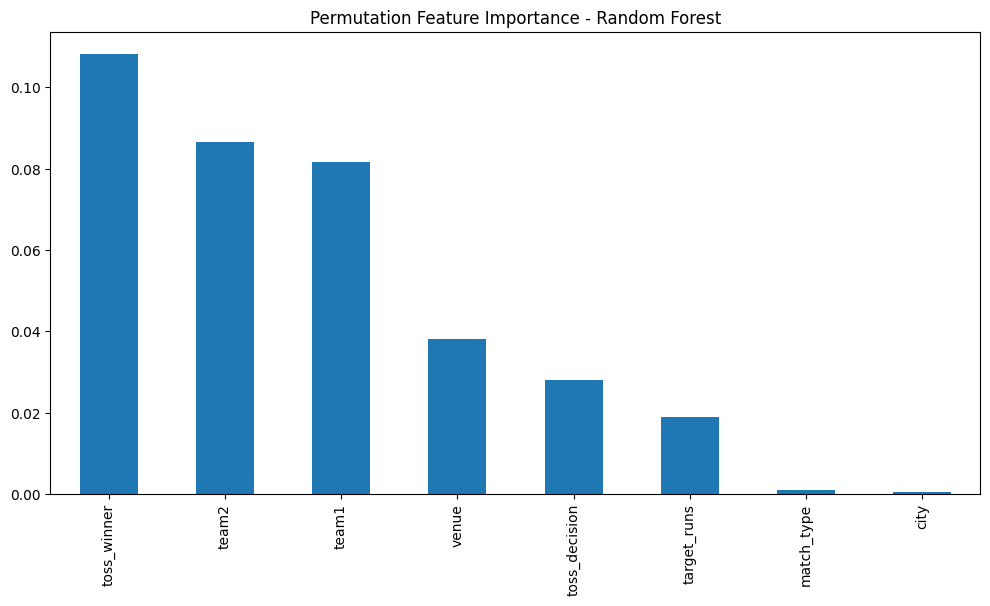

In [25]:
perm_importance = permutation_importance(trained_models["Random Forest"], X_test, y_test, n_repeats=10, random_state=42)
feature_importances = pd.Series(perm_importance.importances_mean, index=X_test.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title("Permutation Feature Importance - Random Forest")
plt.show()

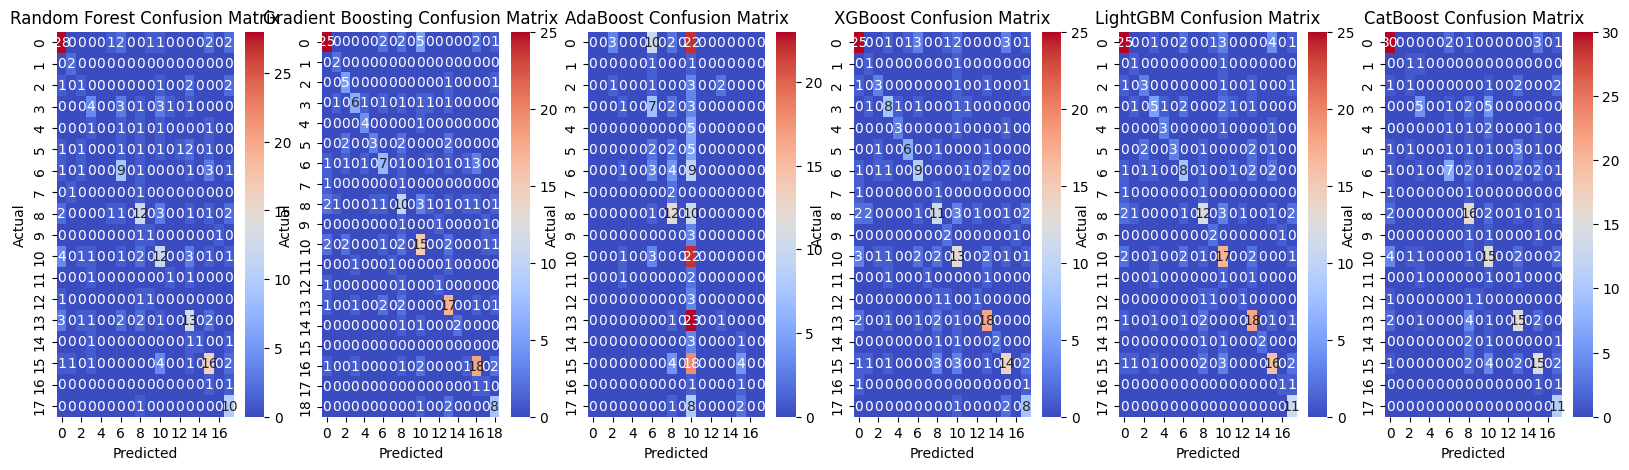

In [26]:
plt.figure(figsize=(20, 5))
for i, (name, model) in enumerate(trained_models.items(), 1):
    predictions = model.predict(X_test)
    plt.subplot(1, len(models), i)
    sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='coolwarm')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.show()

In [27]:
joblib.dump(best_model, "best_model_for_ipl.pkl")

['best_model_for_ipl.pkl']

In [29]:
def predict_match_winner(input_data):

    best_model = joblib.load("best_model_for_ipl.pkl")
    scaler = joblib.load("scaler_ipl.pkl")
    encoders = joblib.load("encoder_ipl.pkl")
    
    categorical_features = ["city", "match_type", "venue", "team1", "team2", "toss_winner", "toss_decision"]
    numerical_features = ["target_runs"]
    
    df = pd.DataFrame([input_data])
    
    for col in categorical_features:
        if col in encoders:
            df[col] = encoders[col].transform(df[col])
    
    df[numerical_features] = scaler.transform(df[numerical_features])
    
    prediction = best_model.predict(df)[0]
    
    winner_team = list(encoders["winner"].classes_)[prediction]
    return winner_team

input_data = {
    "city": "Hyderabad",
    "match_type": "League",
    "venue": "Rajiv Gandhi International Stadium, Uppal, Hyderabad",
    "team1": "Sunrisers Hyderabad",
    "team2": "Rajasthan Royals",
    "toss_winner": "Rajasthan Royals",
    "toss_decision": "field",
    "target_runs": 286
}
print(predict_match_winner(input_data))

Sunrisers Hyderabad


In [35]:
def predict_match_winner(input_data):

    best_model = joblib.load("best_model_for_ipl.pkl")
    scaler = joblib.load("scaler_ipl.pkl")
    encoders = joblib.load("encoder_ipl.pkl")
    
    categorical_features = ["city", "match_type", "venue", "team1", "team2", "toss_winner", "toss_decision"]
    numerical_features = ["target_runs"]
    
    df = pd.DataFrame([input_data])
    
    for col in categorical_features:
        if col in encoders:
            df[col] = encoders[col].transform(df[col])
    
    df[numerical_features] = scaler.transform(df[numerical_features])
    
    prediction = best_model.predict(df)[0]
    
    winner_team = list(encoders["winner"].classes_)[prediction]
    return winner_team

input_data = {
    "city": "Kolkata",
    "match_type": "League",
    "venue": "Eden Gardens",
    "team1": "Royal Challengers Bengaluru",
    "team2": "Kolkata Knight Riders",
    "toss_winner": "Royal Challengers Bengaluru",
    "toss_decision": "field",
    "target_runs": 175
}
print(predict_match_winner(input_data))

Kolkata Knight Riders
